In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/flipkart_com-ecommerce_sample_1050.csv")

In [3]:
df.shape

(1050, 15)

In [3]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [3]:
liste_categories = [c[2:-1].split('>>')[0][0:-1].lower().replace(" ","_") for c in df["product_category_tree"]]

In [4]:
dico_categories = {}
for c in liste_categories:
    if c not in dico_categories.keys():
        dico_categories[c] = 1
    else:
        dico_categories[c]+=1

In [5]:
dico_categories

{'home_furnishing': 150,
 'baby_care': 150,
 'watches': 150,
 'home_decor_&_festive_needs': 150,
 'kitchen_&_dining': 150,
 'beauty_and_personal_care': 150,
 'computers': 150}

In [7]:
df['description'].isna().sum()

0

In [6]:
df = df[['product_category_tree','description']]

In [7]:
df['categorie'] = liste_categories

In [8]:
df = df[['categorie','description']]

# text hero

In [11]:
import texthero as hero

ModuleNotFoundError: No module named 'texthero'

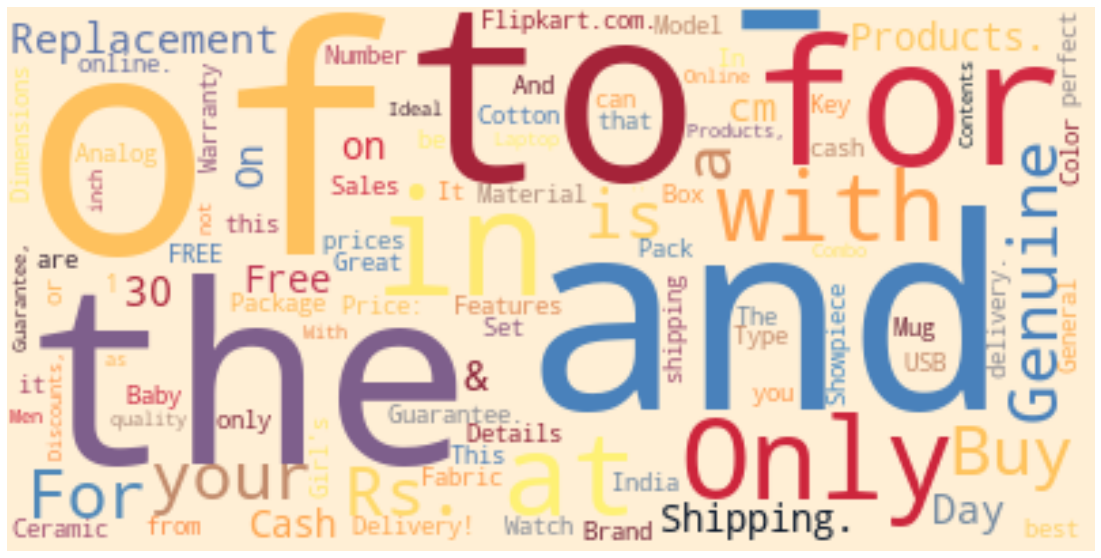

In [ ]:
hero.wordcloud(df.description, max_words=100,)

In [ ]:
NUM_TOP_WORDS = 5
df.groupby('categorie')['description'].apply(lambda x: hero.top_words(x)[:NUM_TOP_WORDS])

categorie                               
baby_care                   of              367
                            Baby            284
                            Details         173
                            Girl's          160
                            Fabric          150
beauty_and_personal_care    of              199
                            and             161
                            Flipkart.com    159
                            for             146
                            the             115
computers                   for             219
                            and             209
                            to              209
                            the             193
                            USB             169
home_decor_&_festive_needs  of              303
                            cm              277
                            -               241
                            and             221
                            the             203

In [ ]:
[d for d in df['description'] if "-" in d][3]

'Maserati Time R8851116001 Analog Watch  - For Boys - Buy Maserati Time R8851116001 Analog Watch  - For Boys  R8851116001 Online at Rs.24400 in India Only at Flipkart.com. - Great Discounts, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!'

# Test keras

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [10]:
X = df['description']
y=df['categorie']
X_2, X_test, y_2, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_2, y_2, test_size=0.15, random_state=42)


In [11]:
stop_words = ["of","and","at","the","for","-"]
vectorizer = CountVectorizer(stop_words=stop_words)
vectorizer.fit(X)
X_train_vect = vectorizer.transform(X_train)
X_test_vect = vectorizer.transform(X_test)
X_val_vect = vectorizer.transform(X_val)

X_train_vect.shape

(758, 6048)

In [33]:
len(vectorizer.vocabulary_)
#6053

6048

In [43]:
# La première couches a autant de neurones que mon vocabulaire a de mots (= nb de features)
input_dim = X_train_vect.shape[1] # Number of features

# Je définis l'architecture de mon réseau de neurones
model = Sequential()
model.add(layers.Dense(64, input_dim=input_dim, activation='relu'))
model.add(layers.Dropout(0.2))
# Classification multinomial donc soft max et 4 classes à prédire donc 4 neuones
model.add(layers.Dense(7, activation='softmax'))

In [44]:
model.compile(loss='CategoricalCrossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 64)                387136    
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 7)                 455       
Total params: 387,591
Trainable params: 387,591
Non-trainable params: 0
_________________________________________________________________


In [17]:
y_train.value_counts()

beauty_and_personal_care      117
watches                       112
kitchen_&_dining              109
baby_care                     109
home_furnishing               106
home_decor_&_festive_needs    104
computers                     101
Name: categorie, dtype: int64

In [22]:
# je dois trasnformer ma variable cible en dummies 
# afin que chaque neurone de la dernière couche ait sa propre colone.
from tensorflow.keras.utils import to_categorical
#y_train.replace(["happy","sadness","anger","fear","love","surprise"],[0,1,2,3,4,5],inplace=True)
#y_test.replace(["happy","sadness","anger","fear","love","surprise"],[0,1,2,3,4,5],inplace=True)
y_train.replace(["beauty_and_personal_care","kitchen_&_dining","baby_care","home_decor_&_festive_needs","watches","home_furnishing","computers"],[0,1,2,3,4,5,6],inplace=True)
y_test.replace(["beauty_and_personal_care","kitchen_&_dining","baby_care","home_decor_&_festive_needs","watches","home_furnishing","computers"],[0,1,2,3,4,5,6],inplace=True)
y_val.replace(["beauty_and_personal_care","kitchen_&_dining","baby_care","home_decor_&_festive_needs","watches","home_furnishing","computers"],[0,1,2,3,4,5,6],inplace=True)

dummy_y_train = to_categorical( y_train)
dummy_y_test = to_categorical( y_test)
dummy_y_val = to_categorical( y_val)


In [45]:
history = model.fit(X_train_vect,dummy_y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_val_vect, dummy_y_val),
                    batch_size=32)

Epoch 1/10
24/24 [==============================] - 0s 8ms/step - loss: 1.5492 - accuracy: 0.5488 - val_loss: 1.1475 - val_accuracy: 0.7836
Epoch 2/10
24/24 [==============================] - 0s 3ms/step - loss: 0.7831 - accuracy: 0.9037 - val_loss: 0.7215 - val_accuracy: 0.8657
Epoch 3/10
24/24 [==============================] - 0s 4ms/step - loss: 0.4134 - accuracy: 0.9604 - val_loss: 0.5158 - val_accuracy: 0.9104
Epoch 4/10
24/24 [==============================] - 0s 4ms/step - loss: 0.2413 - accuracy: 0.9776 - val_loss: 0.4199 - val_accuracy: 0.8955
Epoch 5/10
24/24 [==============================] - 0s 4ms/step - loss: 0.1510 - accuracy: 0.9868 - val_loss: 0.3648 - val_accuracy: 0.9179
Epoch 6/10
24/24 [==============================] - 0s 4ms/step - loss: 0.1072 - accuracy: 0.9881 - val_loss: 0.3316 - val_accuracy: 0.9254
Epoch 7/10
24/24 [==============================] - 0s 4ms/step - loss: 0.0777 - accuracy: 0.9921 - val_loss: 0.3116 - val_accuracy: 0.9254
Epoch 8/10
24/24 [==

In [46]:
model.evaluate(X_test_vect,dummy_y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.2143 - accuracy: 0.9430


[0.21434810757637024, 0.9430379867553711]